<a href="https://colab.research.google.com/github/arelsaputra/CNN/blob/main/fruit360_classification_set_Accuracy_98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dataset

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing libraries

In [83]:
from google.colab import drive
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import os

# Data Preprocessing

## Image Augmentation

In [85]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Load datasets

In [87]:
batch_size = 36

## Training Image preprocessing

In [88]:
train_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Training_fruit_vegetable/train',
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3115 images belonging to 36 classes.


## Test Image Preprocessing

In [89]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Training_fruit_vegetable/test',
    labels="inferred",
    label_mode="categorical",
    batch_size=batch_size,
    image_size=(64, 64),
    shuffle=True
)

Found 359 files belonging to 36 classes.


## Validation Image Preprocessing

In [90]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Training_fruit_vegetable/validation',
    labels="inferred",
    label_mode="categorical",
    batch_size=batch_size,
    image_size=(64, 64),
    shuffle=True
)

Found 351 files belonging to 36 classes.


# Building Model

In [91]:
# Build the model
cnn = tf.keras.models.Sequential()

# Building Convolution Layer

In [92]:
# First Convolutional Block
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.BatchNormalization())

In [93]:
# Second Convolutional Block
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.BatchNormalization())

In [94]:
# Flattening
cnn.add(tf.keras.layers.Flatten())

In [95]:
# Fully Connected Layers
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

In [96]:
# Output Layer
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))


# Compiling and Training Phase

In [97]:
# Compile the model
cnn.compile(optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [98]:
# Summarize the model
cnn.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 batch_normalization_9 (Bat  (None, 31, 31, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 31, 31, 64)       

In [99]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=2)
]

In [100]:
# Train the model
training_history = cnn.fit(x=test_set, validation_data=validation_set, epochs=30,callbacks=callbacks)


Epoch 1/30
10/10 [==============================] - 36s 2s/step - loss: 4.3310 - accuracy: 0.0418 - val_loss: 16.1121 - val_accuracy: 0.0427 - lr: 0.0010
Epoch 2/30
10/10 [==============================] - 33s 2s/step - loss: 3.6125 - accuracy: 0.1031 - val_loss: 12.8675 - val_accuracy: 0.0399 - lr: 0.0010
Epoch 3/30
10/10 [==============================] - 31s 2s/step - loss: 3.2213 - accuracy: 0.2033 - val_loss: 10.8645 - val_accuracy: 0.0427 - lr: 0.0010
Epoch 4/30
10/10 [==============================] - 31s 2s/step - loss: 2.6750 - accuracy: 0.2618 - val_loss: 6.5592 - val_accuracy: 0.1083 - lr: 0.0010
Epoch 5/30
10/10 [==============================] - 32s 2s/step - loss: 2.3258 - accuracy: 0.3454 - val_loss: 3.8653 - val_accuracy: 0.1738 - lr: 0.0010
Epoch 6/30
10/10 [==============================] - 32s 2s/step - loss: 2.1184 - accuracy: 0.3872 - val_loss: 2.4423 - val_accuracy: 0.3162 - lr: 0.0010
Epoch 7/30
10/10 [==============================] - 33s 2s/step - loss: 1.8058 

# Evaluating Model

In [113]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(test_set)
print('Training accuracy:', train_acc)

10/10 [==============================] - 14s 203ms/step - loss: 0.0361 - accuracy: 0.9916
Training accuracy: 0.9916434288024902


In [114]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 [==============================] - 15s 210ms/step - loss: 0.0338 - accuracy: 0.9915
Validation accuracy: 0.9914529919624329


# Saving Model

In [115]:
cnn.save('trained_model.h5')

In [116]:
training_history.history #Return Dictionary of history

{'loss': [4.330984592437744,
  3.612484931945801,
  3.221327066421509,
  2.6750247478485107,
  2.325761079788208,
  2.118380069732666,
  1.805800199508667,
  1.5858346223831177,
  1.3523705005645752,
  1.0951993465423584,
  1.078413724899292,
  0.7792515754699707,
  0.7620275020599365,
  0.6110444664955139,
  0.5707105994224548,
  0.4454957842826843,
  0.4097457528114319,
  0.34025272727012634,
  0.34699690341949463,
  0.2648877799510956,
  0.23855674266815186,
  0.21947963535785675,
  0.2399900257587433,
  0.19426502287387848,
  0.16349028050899506],
 'accuracy': [0.04178272932767868,
  0.10306406766176224,
  0.20334261655807495,
  0.261838436126709,
  0.34540390968322754,
  0.38718661665916443,
  0.49025070667266846,
  0.543175458908081,
  0.6183844208717346,
  0.688022255897522,
  0.6935933232307434,
  0.8022283911705017,
  0.8022283911705017,
  0.844011127948761,
  0.8551532030105591,
  0.8774373531341553,
  0.8969359397888184,
  0.9192200303077698,
  0.9080780148506165,
  0.933147

# Calculating Accuracy of Model Achieved on Validation set

In [120]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 98.57549667358398 %


# Accuracy Visualization

## Training Visualization

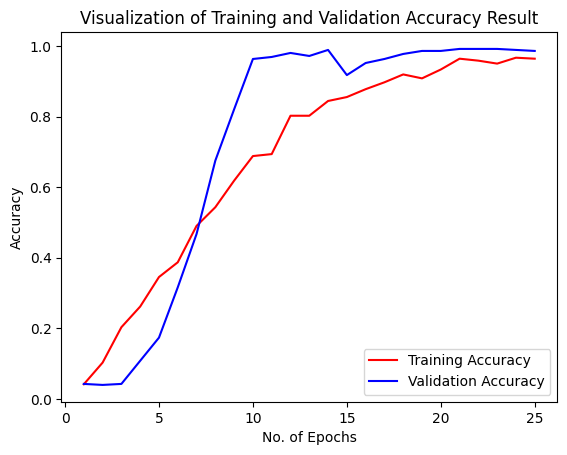

In [123]:
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Training and Validation Accuracy Result')
plt.legend()
plt.show()

## Validation Accuracy

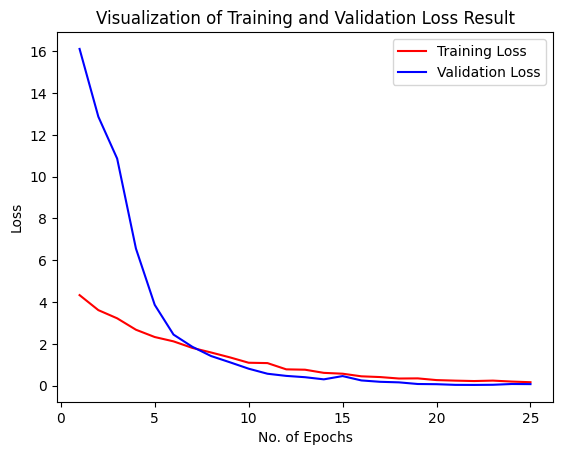

In [125]:
plt.plot(epochs, training_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Visualization of Training and Validation Loss Result')
plt.legend()
plt.show()

# Test set Evaluation

In [126]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Training_fruit_vegetable/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [127]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

10/10 [==============================] - 13s 293ms/step - loss: 0.0361 - accuracy: 0.9916
Test accuracy: 0.9916434288024902


# Predict classes for the test set

In [128]:
predictions = cnn.predict(test_set)
predicted_classes = np.argmax(predictions, axis=1)

10/10 [==============================] - 15s 270ms/step


# Get true classes from the test set

In [129]:
true_classes = np.concatenate([y for x, y in test_set], axis=0)
true_classes = np.argmax(true_classes, axis=1)

# Classification report

In [132]:
report = classification_report(true_classes, predicted_classes, target_names=fruit_names)
print("Classification Report:\n\n", report)

Classification Report:

                precision    recall  f1-score   support

        apple       0.00      0.00      0.00        10
       banana       0.00      0.00      0.00         9
     beetroot       0.00      0.00      0.00        10
  bell pepper       0.00      0.00      0.00        10
      cabbage       0.20      0.20      0.20        10
     capsicum       0.00      0.00      0.00        10
       carrot       0.10      0.10      0.10        10
  cauliflower       0.00      0.00      0.00        10
chilli pepper       0.00      0.00      0.00        10
         corn       0.00      0.00      0.00        10
     cucumber       0.00      0.00      0.00        10
     eggplant       0.00      0.00      0.00        10
       garlic       0.00      0.00      0.00        10
       ginger       0.00      0.00      0.00        10
       grapes       0.10      0.10      0.10        10
     jalepeno       0.00      0.00      0.00        10
         kiwi       0.00      0.00     

# Predict a single image

In [133]:
test_data = '/content/drive/MyDrive/Training_fruit_vegetable/test/apple/Image_1.jpg'
true_class = os.path.basename(os.path.dirname(test_data))
test_img = image.load_img(test_data, target_size=(64, 64))
img_arr = image.img_to_array(test_img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr /= 255.0

In [135]:
prediksi = cnn.predict(img_arr)  # Make prediction
hasil_prediksi = np.argmax(prediksi)  # Get predicted class index

1/1 [==============================] - 1s 678ms/step


## Display image

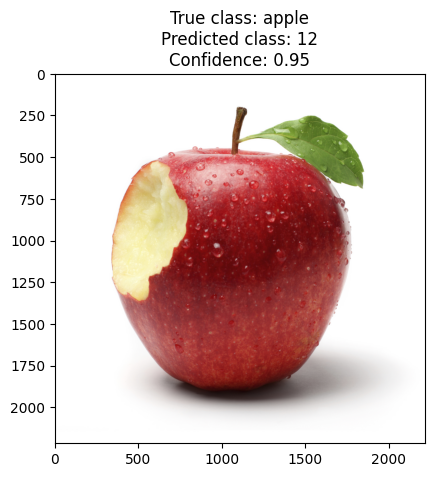

In [137]:
img = mpimg.imread(test_data)
imgplot = plt.imshow(img)
plt.title(f"True class: {true_class}\nPredicted class: {hasil_prediksi}\nConfidence: {prediksi[0][np.argmax(prediksi)]:.2f}")
plt.show()
